##### Data Dictionary:

### RATINGS FILE DESCRIPTION  
=========================================================================  
All ratings are contained in the file **"ratings.dat"** and are in the following format:  
`UserID::MovieID::Rating::Timestamp`  

- **UserIDs** range between **1 and 6040**  
- **MovieIDs** range between **1 and 3952**  
- **Ratings** are made on a **5-star scale** (whole-star ratings only)  
- **Timestamp** is represented in **seconds**  
- **Each user has at least 20 ratings**  

---

### USERS FILE DESCRIPTION  
=========================================================================  
User information is in the file **"users.dat"** and is in the following format:  
`UserID::Gender::Age::Occupation::Zip-code`  

- All demographic information is provided voluntarily by the users and is **not checked for accuracy**.  
- Only users who have provided some demographic information are included in this dataset.  
- **Gender** is denoted by:
  - `"M"` for male  
  - `"F"` for female  

#### Age Groups:  
- `1`: "Under 18"  
- `18`: "18-24"  
- `25`: "25-34"  
- `35`: "35-44"  
- `45`: "45-49"  
- `50`: "50-55"  
- `56`: "56+"  

#### Occupations:  
- `0`: "Other" or not specified  
- `1`: "Academic/Educator"  
- `2`: "Artist"  
- `3`: "Clerical/Admin"  
- `4`: "College/Grad Student"  
- `5`: "Customer Service"  
- `6`: "Doctor/Health Care"  
- `7`: "Executive/Managerial"  
- `8`: "Farmer"  
- `9`: "Homemaker"  
- `10`: "K-12 Student"  
- `11`: "Lawyer"  
- `12`: "Programmer"  
- `13`: "Retired"  
- `14`: "Sales/Marketing"  
- `15`: "Scientist"  
- `16`: "Self-Employed"  
- `17`: "Technician/Engineer"  
- `18`: "Tradesman/Craftsman"  
- `19`: "Unemployed"  
- `20`: "Writer"  

---

### MOVIES FILE DESCRIPTION  
=========================================================================  
Movie information is in the file **"movies.dat"** and is in the following format:  
`MovieID::Title::Genres`  

- Titles are identical to those provided by IMDB (including year of release).  
- Genres are **pipe (`|`) separated** and are selected from the following genres:  

  - **Action**  
  - **Adventure**  
  - **Animation**  
  - **Children's**  
  - **Comedy**  
  - **Crime**  
  - **Documentary**  
  - **Drama**  
  - **Fantasy**  
  - **Film-Noir**  
  - **Horror**  
  - **Musical**  
  - **Mystery**  
  - **Romance**  
  - **Sci-Fi**  
  - **Thriller**  
  - **War**  
  - **Western**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
movies = pd.read_fwf('../content/zee-movies.dat', encoding='ISO-8859-1')
ratings = pd.read_fwf('../content/zee-ratings.dat', encoding='ISO-8859-1')
users = pd.read_fwf('../content/zee-users.dat', encoding='ISO-8859-1')

In [5]:
movies.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [6]:
ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [7]:
users.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


### Splitting the rows in each table seperated by '::'

In [8]:
users = users['UserID::Gender::Age::Occupation::Zip-code'].str.split("::",expand=True)
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
ratings = ratings['UserID::MovieID::Rating::Timestamp'].str.split("::",expand=True)
ratings.columns = ['UserID','MovieID','Rating','Timestamp']
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [10]:
movies = movies['Movie ID::Title::Genres'].str.split("::",expand=True)
movies.columns = ['Movie ID','Title','Genres']
movies.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies.rename(columns={'Movie ID':'MovieID'}, inplace=True)

In [12]:
movies.head(3)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [13]:
users['Age'].unique()

array(['1', '56', '25', '45', '50', '35', '18'], dtype=object)

### We notice that there are only 7 unique Age values, which represent a range.

In [14]:
users.replace({'Age':{'1':  "Under 18",
                      '18':  "18-24",
                      '25':  "25-34",
                      '35':  "35-44",
                      '45':  "45-49",
                      '50':  "50-55",
                      '56':  "56 Above"}}, inplace=True)

### Replacing the occupation values with their corresponding occupation names.

In [15]:
users.replace({'Occupation':{'0': "other",
                             '1': "academic/educator",
                             '2': "artist",
                             '3': "clerical/admin",
                             '4': "college/grad student",
                             '5': "customer service",
                             '6': "doctor/health care",
                             '7': "executive/managerial",
                             '8': "farmer",
                             '9': "homemaker",
                             '10': "k-12 student",
                             '11': "lawyer",
                             '12': "programmer",
                             '13': "retired",
                             '14': "sales/marketing",
                             '15': "scientist",
                             '16': "self-employed",
                             '17': "technician/engineer",
                             '18': "tradesman/craftsman",
                             '19': "unemployed",
                             '20': "writer"}}, inplace=True)

In [16]:
users.head(3)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,Under 18,k-12 student,48067
1,2,M,56 Above,self-employed,70072
2,3,M,25-34,scientist,55117


### Merging Datasets

In [17]:
df = movies.merge(ratings, on='MovieID', how = 'inner')
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [20]:
df_final = df.merge(users, on='UserID', how = 'inner')
df_final.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,Under 18,k-12 student,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50-55,homemaker,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25-34,programmer,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25-34,technician/engineer,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35-44,academic/educator,95370


In [21]:
df_final.shape

(1000209, 10)

In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  object
 1   Title       1000209 non-null  object
 2   Genres      996144 non-null   object
 3   UserID      1000209 non-null  object
 4   Rating      1000209 non-null  object
 5   Timestamp   1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  object
 8   Occupation  1000209 non-null  object
 9   Zip-code    1000209 non-null  object
dtypes: object(10)
memory usage: 76.3+ MB


### Feature Engineering

In [23]:
## Converting rating column to int data type

df_final['Rating'] = df_final['Rating'].astype(int)

In [24]:
## Converting Timestamp to datetime format

df_final['Timestamp'] = pd.to_datetime(df_final['Timestamp'], unit='s')


In [25]:
df_final.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,Under 18,k-12 student,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,2000-12-31 04:30:08,F,50-55,homemaker,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,2000-12-31 03:31:36,M,25-34,programmer,11413


In [26]:
## Extracting Release Year from Title

df_final['ReleaseYear']= df_final['Title'].str.strip().str[-5:-1]

In [27]:
df_final.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,Under 18,k-12 student,48067,1995
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,2000-12-31 04:30:08,F,50-55,homemaker,55117,1995
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,2000-12-31 03:31:36,M,25-34,programmer,11413,1995


In [28]:
df_final['ReleaseYear'].unique()

array(['1995', '1994', '1996', 'n th', '1976', '1993', '1992', '1988',
       '1967', '964)', '1977', 'der ', '1965', '(199', '1982', '1962',
       '1990', '1991', '1989', '1937', '1940', '1969', '1981', '1973',
       '1970', '1960', '1955', '1956', '1959', '1968', '1980', '1975',
       '995)', '1948', '1943', 'he B', '1950', '1987', '1997', ' Art',
       '1974', '1958', '1972', '1998', '1952', '1951', '1957', '1961',
       '1954', '1934', '1944', '1963', '1942', '1941', '1964', '1953',
       '1939', '1947', '1946', '1945', '1938', '1935', '1936', '1926',
       '1949', '1932', '1930', '1971', '1979', '1986', '1966', '1978',
       '1985', '1983', '1984', '1933', '1931', '1922', ') (1', '1927',
       '1929', ' (19', '1928', '1999', "e d'", 'olar', '(196', '1925',
       '981)', '1919', '(198', 'nd) ', '1923', '2000', 'n) (', '1920',
       '1921', 'dron', 'e (1', '989)'], dtype=object)

In [29]:
df_final['ReleaseYear'].nunique()

100

In [30]:
df_final['ReleaseYear'].replace({'964)' : '1964','995)' : '1995','981)' : '1981','989)' : '1989'},inplace = True)

In [31]:
idx_val = df_final[(df_final['ReleaseYear']=='n th') |
               (df_final['ReleaseYear']=='der ') |
               (df_final['ReleaseYear']=='(199') |
               (df_final['ReleaseYear']=='he B') |
               (df_final['ReleaseYear']==' Art') |
               (df_final['ReleaseYear']==') (1') |
               (df_final['ReleaseYear']==' (19') |
               (df_final['ReleaseYear']=='Polar') |
               (df_final['ReleaseYear']=="e d'") |
               (df_final['ReleaseYear']=='olar') |
               (df_final['ReleaseYear']=='(196') |
                (df_final['ReleaseYear']=='(198') |
                (df_final['ReleaseYear']=='nd) ') |
                (df_final['ReleaseYear']=='n) (') |
                (df_final['ReleaseYear']=='dron') |
                (df_final['ReleaseYear']=='e (1')].index

df_final.drop(index=idx_val, inplace=True)
df_final['ReleaseYear'].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1948', '1943', '1950',
       '1987', '1997', '1974', '1958', '1972', '1998', '1952', '1951',
       '1957', '1961', '1954', '1934', '1944', '1963', '1942', '1941',
       '1953', '1939', '1947', '1946', '1945', '1938', '1935', '1936',
       '1926', '1949', '1932', '1930', '1971', '1979', '1986', '1966',
       '1978', '1985', '1983', '1984', '1933', '1931', '1922', '1927',
       '1929', '1928', '1999', '1925', '1919', '1923', '2000', '1920',
       '1921'], dtype=object)

In [32]:
df_final['ReleaseYear'] = df_final['ReleaseYear'].astype(int)

In [33]:
df_final.dtypes

,0
MovieID,object
Title,object
Genres,object
UserID,object
Rating,int64
Timestamp,datetime64[ns]
Gender,object
Age,object
Occupation,object
Zip-code,object


In [34]:
df_final['Title'] = df_final['Title'].str.strip().str[:-7]

In [35]:
df_final.sample(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear
396333,1365,Ridicule,Drama,531,3,2001-01-08 16:51:29,F,18-24,sales/marketing,22206,1996
387730,1334,"Blob, The",Horror|Sci-Fi,5075,3,2000-07-01 03:29:08,M,50-55,doctor/health care,97470,1958
556792,2028,Saving Private Ryan,Action|Drama|War,4141,5,2000-08-04 00:49:30,M,35-44,technician/engineer,95014,1998
210161,879,"Relic, The",Horror,1050,2,2000-11-23 06:48:47,M,25-34,academic/educator,97302,1997
849827,3175,Galaxy Quest,Adventure|Comedy|Sci-Fi,2887,4,2000-10-21 15:40:47,M,25-34,clerical/admin,66205,1999


In [36]:
bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 2000]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
df_final['ReleaseDecade'] = pd.cut(df_final['ReleaseYear'], bins=bins, labels=labels)

In [37]:
df_final.sample(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear,ReleaseDecade
402955,1376,Star Trek IV: The Voyage Home,Action|Adventure|Sci-Fi,1031,4,2000-11-23 17:04:37,M,35-44,self-employed,19803,1986,80s
511687,1914,Smoke Signals,Comedy|Drama,1354,5,2000-11-21 02:31:43,F,25-34,artist,94040,1998,90s
711664,2648,Frankenstein,Horror,5909,5,2000-05-03 16:58:55,M,18-24,writer,91330,1931,30s
846946,3168,Easy Rider,Adventure|Drama,424,4,2000-12-08 16:26:16,M,25-34,technician/engineer,55112,1969,60s
258268,1060,Swingers,Comedy|Drama,854,3,2000-11-27 19:08:19,F,25-34,self-employed,44092,1996,90s


### Data Cleaning

In [38]:
df_final.isna().sum()

,0
MovieID,0
Title,0
Genres,521
UserID,0
Rating,0
Timestamp,0
Gender,0
Age,0
Occupation,0
Zip-code,0


### Exploratory Data Analysis (EDA)

In [39]:
df_final.sample(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear,ReleaseDecade
504092,1876,Deep Impact,Action|Drama|Sci-Fi|Thriller,5956,3,2000-04-30 07:48:34,F,18-24,college/grad student,02142,1998,90s
646954,2391,"Simple Plan, A",Crime|Thriller,4053,3,2000-08-05 16:23:09,M,25-34,tradesman/craftsman,36264,1998,90s
865464,3255,"League of Their Own, A",Comedy|Drama,136,2,2000-12-21 18:38:06,M,18-24,artist,21202,1992,90s
377849,1297,Real Genius,Comedy,2681,3,2000-11-05 02:20:13,F,25-34,college/grad student,48823,1985,80s
436880,1544,"Lost World: Jurassic Park, The",Action|Adventure|Sci-Fi|Th,3715,5,2000-08-14 15:15:58,M,18-24,customer service,55428,1997,90s


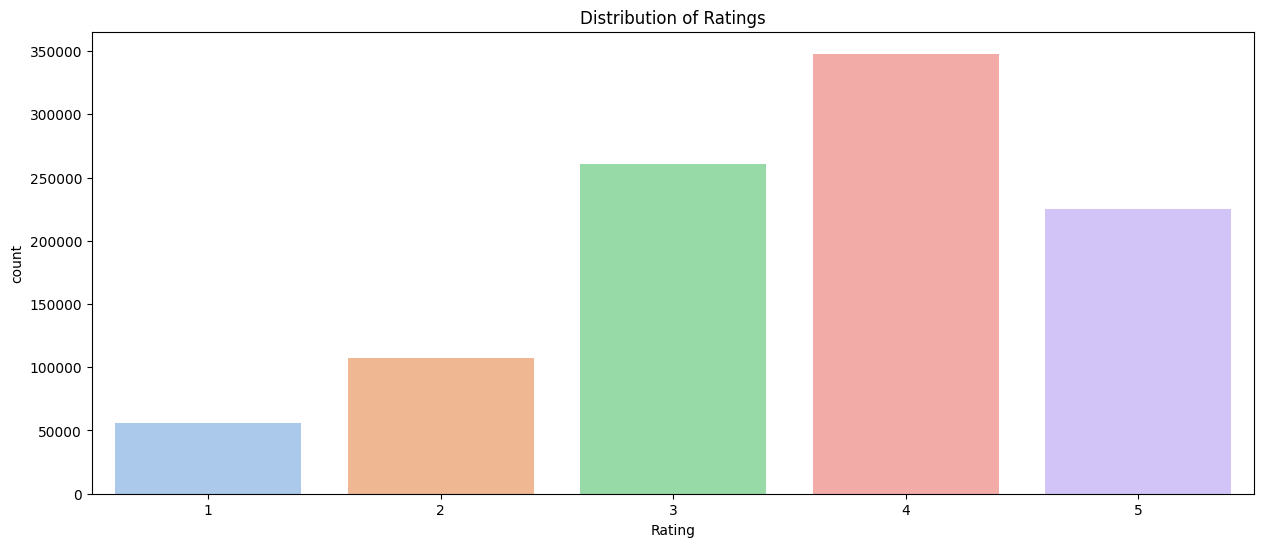

In [40]:
plt.figure(figsize = (15,6))
sns.countplot(x = df_final['Rating'],palette="pastel")
plt.title('Distribution of Ratings')
plt.show()

#### Movies with ratings of 3 and 4 make up the majority of the total movie count.

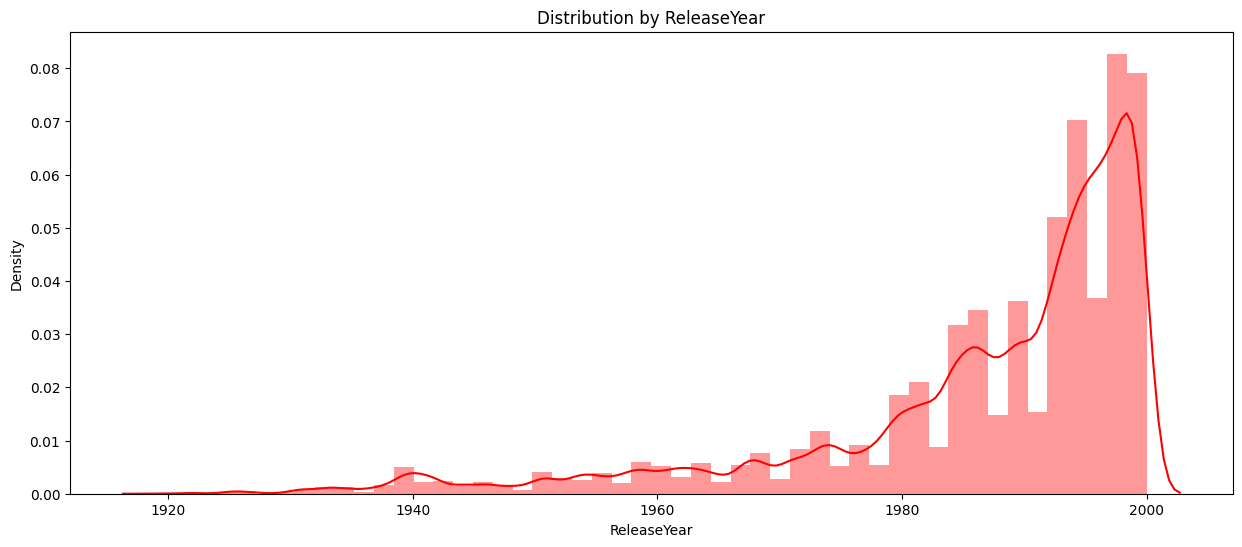

In [41]:
plt.figure(figsize = (15,6))
sns.distplot(df_final['ReleaseYear'],color = 'red')
plt.title('Distribution by ReleaseYear')
plt.show()

#### As expected, movies released during 90s make up the majority of total movie count.

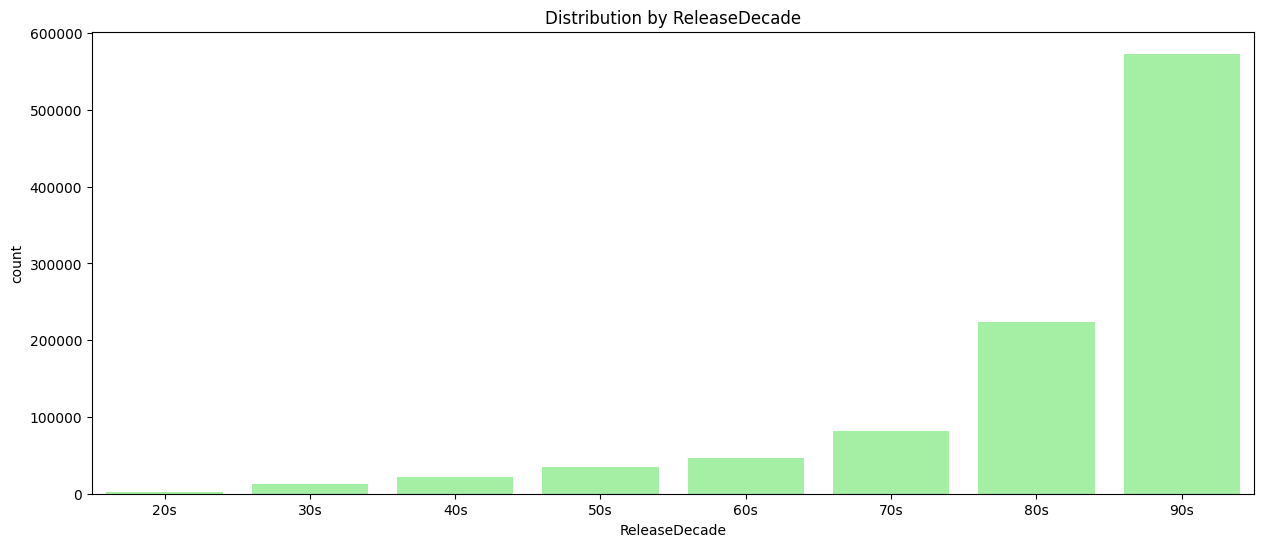

In [42]:
plt.figure(figsize = (15,6))
sns.countplot(x = df_final['ReleaseDecade'],palette=["#98FB98"])
plt.title('Distribution by ReleaseDecade')
plt.show()

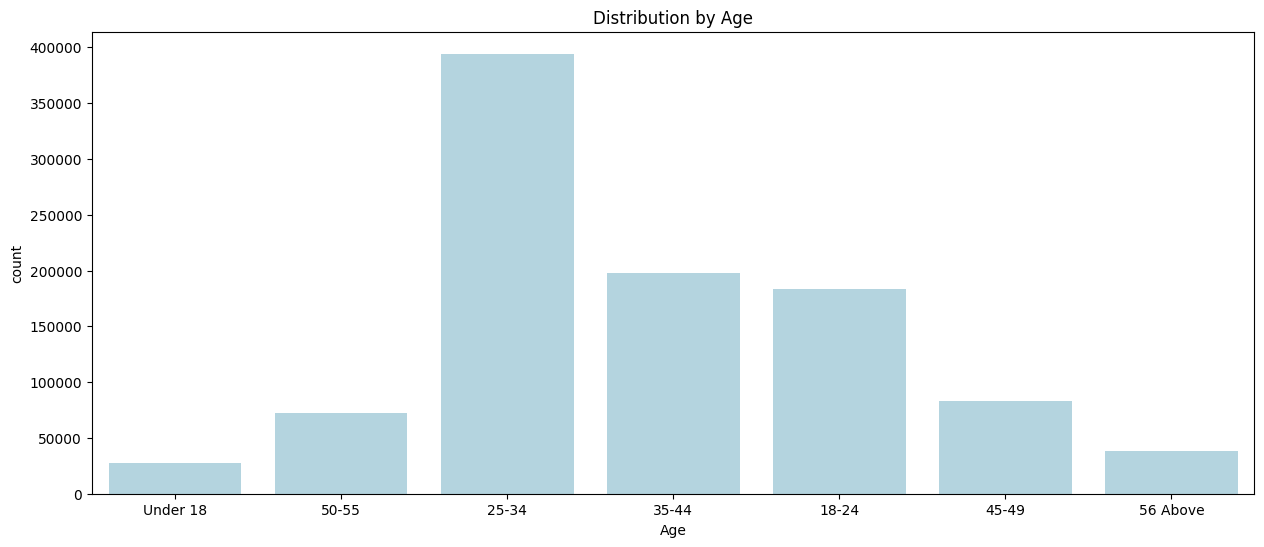

In [43]:
plt.figure(figsize = (15,6))
sns.countplot(x = df_final['Age'],palette=["#ADD8E6"])
plt.title('Distribution by Age')
plt.show()

#### Users aged 25-34 are the most frequent movie watchers.

In [44]:
sorted_counts = df_final['Occupation'].value_counts()

In [45]:
sunset_gradient = ["#FF4500", "#FF6347", "#FF7F50", "#FFA07A"]

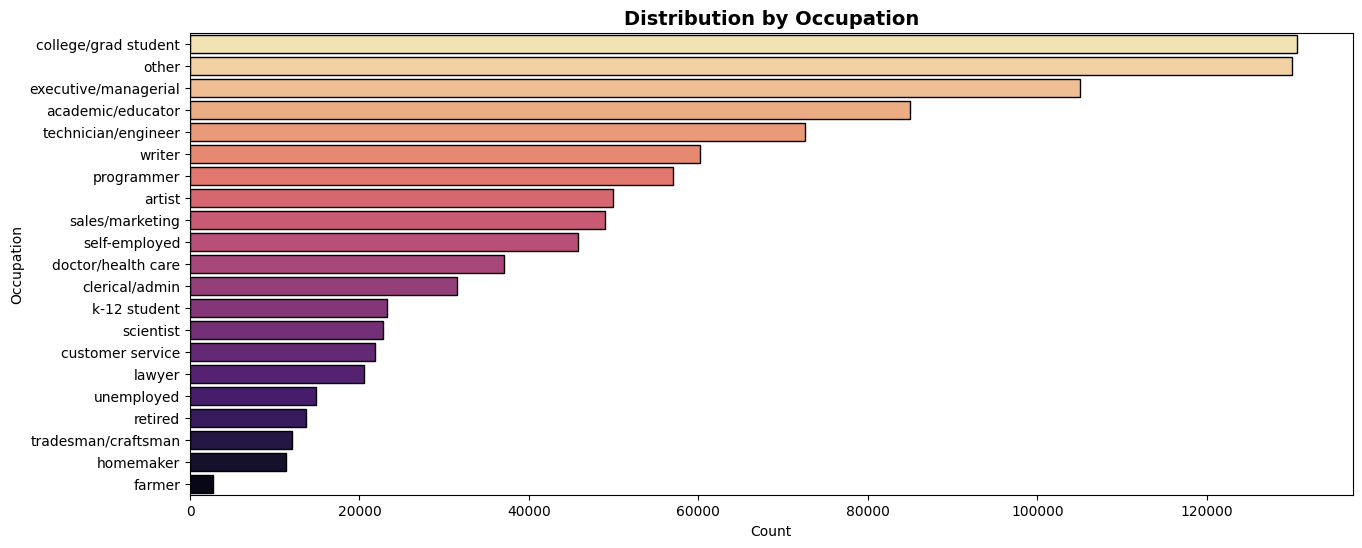

In [46]:
sunset_gradient = sns.color_palette("magma", len(sorted_counts))

plt.figure(figsize=(15, 6))
sns.countplot(
    y=df_final['Occupation'],
    order=sorted_counts.index,
    palette=sunset_gradient[::-1],
    edgecolor="black"
)

plt.title('Distribution by Occupation', fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Occupation")

plt.show()

#### College and graduate students make up the majority of the data.

In [47]:
df_grouped = df_final.groupby(['Age', 'Genres']).agg({'Rating': 'mean'}).reset_index()
df_sorted = df_grouped.sort_values(by=['Age', 'Rating'], ascending=[True, False])
df_temp = df_sorted.groupby('Age').head(3)
df_temp

,Age,Genres,Rating
185,18-24,Animation|Comedy|Thriller,4.562500
4,18-24,Action|Adv,4.442142
31,18-24,Action|Adventure|Fantas,4.427046
356,25-34,Acti,5.000000
385,25-34,Action|Adventure|Fantas,4.572695
539,25-34,Animation|Comedy|Thriller,4.506711
841,35-44,Adventure|Children's|Drama|Musical,4.446384
892,35-44,Animation|Comedy|Thriller,4.364238
739,35-44,Action|Adventure|Fantas,4.354633
1337,45-49,Document,5.000000


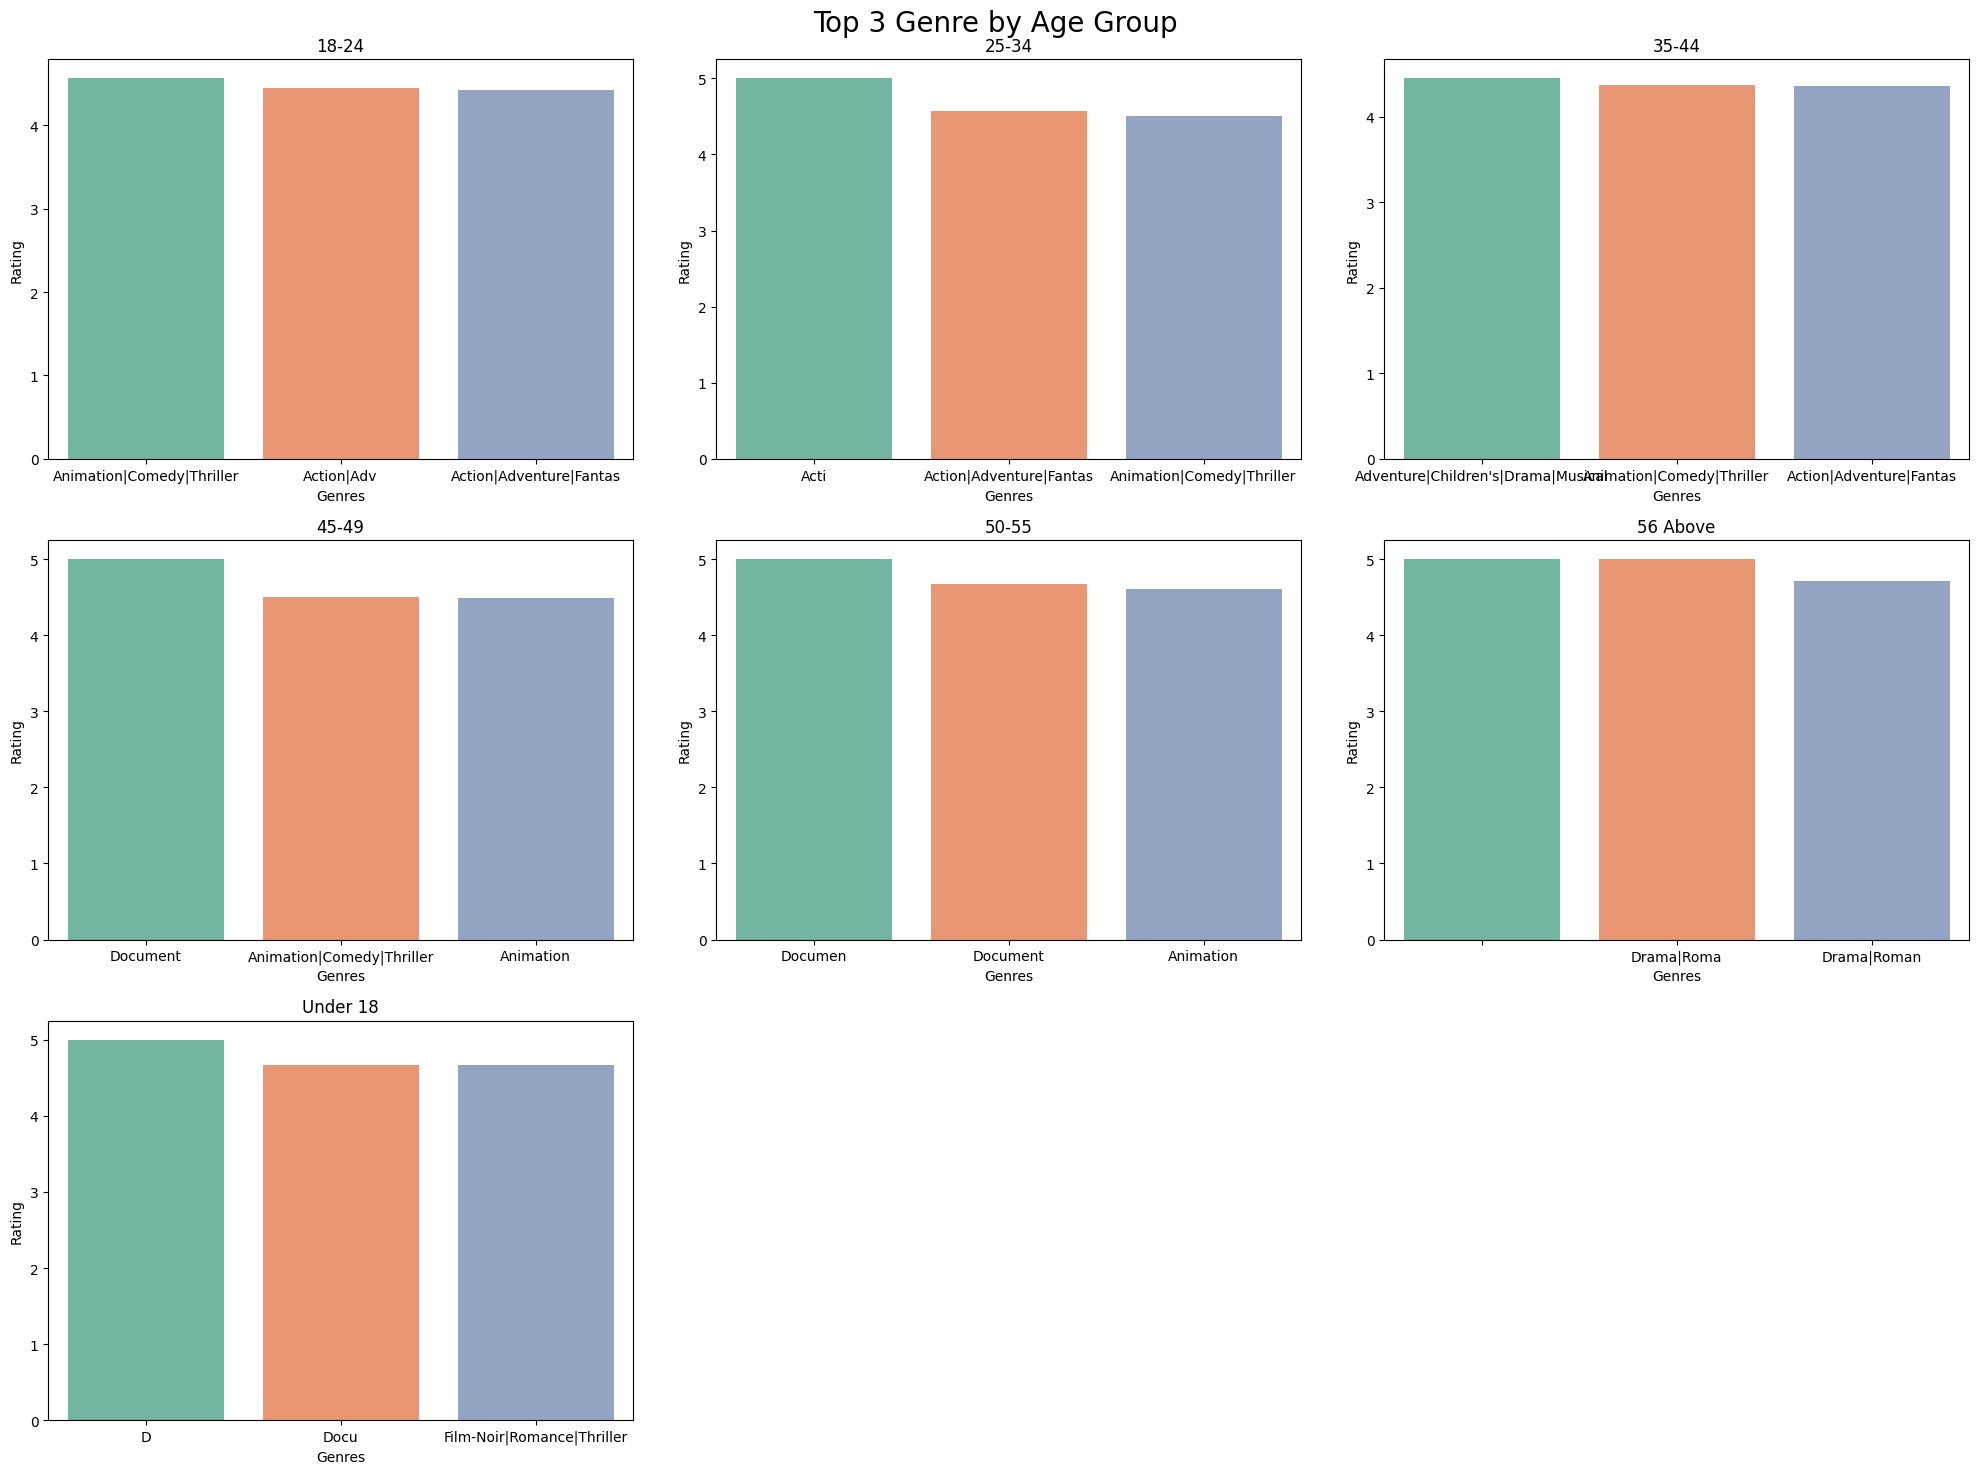

In [48]:
fig, ax = plt.subplots(figsize=(20, 15), nrows=3, ncols=3)
fig.suptitle('Top 3 Genre by Age Group', fontsize=20)

palette = sns.color_palette("Set2")

# Age 18-24
df_age1 = df_temp[df_temp['Age'] == '18-24']
sns.barplot(data=df_age1, x=df_age1['Genres'], y=df_age1['Rating'], ax=ax[0, 0], palette=palette)
ax[0, 0].set_title('18-24')

# Age 25-34
df_age2 = df_temp[df_temp['Age'] == '25-34']
sns.barplot(data=df_age2, x=df_age2['Genres'], y=df_age2['Rating'], ax=ax[0, 1], palette=palette)
ax[0, 1].set_title('25-34')

# Age 35-44
df_age3 = df_temp[df_temp['Age'] == '35-44']
sns.barplot(data=df_age3, x=df_age3['Genres'], y=df_age3['Rating'], ax=ax[0, 2], palette=palette)
ax[0, 2].set_title('35-44')

# Age 45-49
df_age4 = df_temp[df_temp['Age'] == '45-49']
sns.barplot(data=df_age4, x=df_age4['Genres'], y=df_age4['Rating'], ax=ax[1, 0], palette=palette)
ax[1, 0].set_title('45-49')

# Age 50-55
df_age5 = df_temp[df_temp['Age'] == '50-55']
sns.barplot(data=df_age5, x=df_age5['Genres'], y=df_age5['Rating'], ax=ax[1, 1], palette=palette)
ax[1, 1].set_title('50-55')

# Age 56 Above
df_age6 = df_temp[df_temp['Age'] == '56 Above']
sns.barplot(data=df_age6, x=df_age6['Genres'], y=df_age6['Rating'], ax=ax[1, 2], palette=palette)
ax[1, 2].set_title('56 Above')

# Under 18
df_age7 = df_temp[df_temp['Age'] == 'Under 18']
sns.barplot(data=df_age7, x=df_age7['Genres'], y=df_age7['Rating'], ax=ax[2, 0], palette=palette)
ax[2, 0].set_title('Under 18')

fig.tight_layout()
fig.delaxes(ax[2, 1])
fig.delaxes(ax[2, 2])

plt.show()

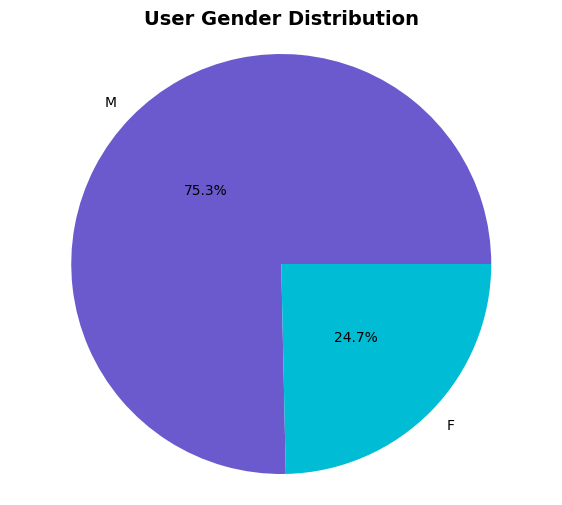

In [49]:
x = df_final['Gender'].value_counts().values

custom_colors = ["#6a5acd", "#00bcd4"]

plt.figure(figsize=(7, 6))
plt.pie(
    x,
    center=(0, 0),
    radius=1.5,
    labels=['M', 'F'],
    autopct='%1.1f%%',
    pctdistance=0.5,
    colors=custom_colors)

plt.title('User Gender Distribution', fontsize=14, fontweight="bold")
plt.axis('equal')

plt.show()

### Grouping the data

In [50]:
## Top 10 titles by average

df_final.groupby('Title')['Rating'].mean().sort_values(ascending=False).head(10)

,Rating
Title,
Lured,5.0
Smashing Time,5.0
"Gate of Heavenly Peace, The",5.0
One Little Indian,5.0
Follow the Bitch,5.0
Bittersweet Motel,5.0
Ulysses (Ulisse),5.0
Schlafes Bruder (Brother of Sleep),5.0
"Baby, The",5.0


In [51]:
## Top 10 titles by ratings count

df_final.groupby('Title')['Rating'].count().sort_values(ascending=False).head(10)

,Rating
Title,
American Beauty,3428
Star Wars: Episode IV - A New Hope,2991
Star Wars: Episode V - The Empire Strikes Back,2990
Star Wars: Episode VI - Return of the Jedi,2883
Jurassic Park,2672
Saving Private Ryan,2653
Terminator 2: Judgment Day,2649
"Matrix, The",2590
Back to the Future,2583


## Model Building
## Collabarative filtering Recommender System

### We will be implementing both user-user and item-item based approach.

In [161]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

### Interaction Matrix

In [75]:
# Aggregate by averaging ratings for duplicate (UserID, Title) pairs
df_matrix = df_final.groupby(['UserID', 'Title'])['Rating'].mean().reset_index()

# Now pivot the cleaned DataFrame
mat = df_matrix.pivot(index='UserID', columns='Title', values='Rating')

mat.head()

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0


In [76]:
## Imputing NaN values with 0

mat.fillna(0, inplace=True)
mat.head()

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0


In [78]:
mat.shape

(6040, 3646)

### Pearson Correlation

Correlation is a measure that tells how closely two variables move in the same or opposite direction. A positive value indicates that they move in the same direction (i.e. if one increases other increases), where as a negative value indicates the opposite.

The most popular correlation measure for numerical data is Pearson’s Correlation. This measures
the degree of linear relationship between two numeric variables and lies between -1 to +1. It is
represented by ‘r’.

* r=1 means perfect positive correlation
* r=-1 means perfect negative correlation
* r=0 means no linear correlation (note, it does not mean no correlation)

## Item-based Approach

In [106]:
movie_name = input('Enter_movie_name :')

Enter_movie_name :Matrix, The


In [108]:
similar_movies = mat.corrwith(mat[movie_name])

In [109]:
df_sim = pd.DataFrame(similar_movies,columns = ['Correlation'])
df_sim.sort_values('Correlation',ascending=False,inplace = True)
df_sim.iloc[1:6]

,Correlation
Title,
Terminator 2: Judgment Day,0.565961
Total Recall,0.543301
"Fifth Element, The",0.515445
Face/Off,0.489569
"Terminator, The",0.483238


### Cosine Similarity

Cosine similarity is a measure of similarity between two sequences of numbers. Those sequences are viewed as vectors in a higher dimensional space, and the cosine similarity is defined as the cosine of the angle between them, i.e. the dot product of the vectors divided by the product of their lengths.

The cosine similarity always belongs to the interval [-1,1]. For example, two proportional vectors have a cosine similarity of 1, two orthogonal vectors have a similarity of 0, and two opposite vectors have a similarity of -1.

In [112]:
item_sim = cosine_similarity(mat.T)
item_sim

array([[1.        , 0.07235746, 0.03701053, ..., 0.        , 0.12024178,
        0.02700277],
       [0.07235746, 1.        , 0.11528952, ..., 0.        , 0.        ,
        0.07780705],
       [0.03701053, 0.11528952, 1.        , ..., 0.        , 0.04752635,
        0.0632837 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04564448],
       [0.12024178, 0.        , 0.04752635, ..., 0.        , 1.        ,
        0.04433508],
       [0.02700277, 0.07780705, 0.0632837 , ..., 0.04564448, 0.04433508,
        1.        ]])

#### Item Similarity Matrix

In [114]:
df_item = pd.DataFrame(item_sim, index=mat.columns, columns=mat.columns)
df_item.head()

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",1.000000,0.072357,0.037011,0.079291,0.060838,0.00000,0.058619,0.189843,0.094785,0.058418,...,0.038725,0.076474,0.000000,0.044074,0.0,0.045280,0.039395,0.000000,0.120242,0.027003
'Night Mother,0.072357,1.000000,0.115290,0.115545,0.159526,0.00000,0.076798,0.137135,0.111413,0.046135,...,0.053010,0.087828,0.063758,0.135962,0.0,0.091150,0.074787,0.000000,0.000000,0.077807
'Til There Was You,0.037011,0.115290,1.000000,0.098756,0.066301,0.08025,0.127895,0.128523,0.079115,0.066598,...,0.029200,0.062893,0.000000,0.079187,0.0,0.022594,0.079261,0.000000,0.047526,0.063284
"'burbs, The",0.079291,0.115545,0.098756,1.000000,0.143620,0.00000,0.192191,0.250140,0.170719,0.197808,...,0.113386,0.207897,0.019962,0.138064,0.0,0.055704,0.161174,0.000000,0.033567,0.110525
...And Justice for All,0.060838,0.159526,0.066301,0.143620,1.000000,0.00000,0.075093,0.178928,0.205486,0.122431,...,0.089998,0.153006,0.067009,0.109029,0.0,0.086080,0.110867,0.074317,0.000000,0.111040


#### item - item similarity

In [271]:
## Enter movie name

movie_name = input('Enter_movie_name :')

Enter_movie_name :Liar Liar


In [272]:
df_item[movie_name].sort_values(ascending=False)[1:6]

,Liar Liar
Title,
Mrs. Doubtfire,0.557067
Ace Ventura: Pet Detective,0.516861
Dumb & Dumber,0.512585
Home Alone,0.511204
Wayne's World,0.499368


#### User Similarity Matrix

In [113]:
user_sim = cosine_similarity(mat)
user_sim

array([[1.        , 0.25531859, 0.12396703, ..., 0.15926709, 0.11935626,
        0.12239079],
       [0.25531859, 1.        , 0.25964457, ..., 0.16569953, 0.13332665,
        0.24845029],
       [0.12396703, 0.25964457, 1.        , ..., 0.20430203, 0.11352239,
        0.30693676],
       ...,
       [0.15926709, 0.16569953, 0.20430203, ..., 1.        , 0.18657496,
        0.18563871],
       [0.11935626, 0.13332665, 0.11352239, ..., 0.18657496, 1.        ,
        0.10827118],
       [0.12239079, 0.24845029, 0.30693676, ..., 0.18563871, 0.10827118,
        1.        ]])

In [115]:
df_user = pd.DataFrame(user_sim, index=mat.index, columns=mat.index)
df_user.head()

UserID,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.255319,0.123967,0.207800,0.139317,0.110320,0.121384,0.180226,0.103896,0.052816,...,0.079367,0.038048,0.032136,0.067631,0.070052,0.035731,0.170184,0.159267,0.119356,0.122391
10,0.255319,1.000000,0.259645,0.280479,0.158703,0.112917,0.141985,0.432536,0.194915,0.102487,...,0.154412,0.186234,0.083739,0.125894,0.118558,0.146552,0.304806,0.165700,0.133327,0.248450
100,0.123967,0.259645,1.000000,0.306067,0.075736,0.110450,0.358686,0.237492,0.172872,0.099147,...,0.098235,0.097953,0.065152,0.178664,0.271311,0.033754,0.344290,0.204302,0.113522,0.306937
1000,0.207800,0.280479,0.306067,1.000000,0.099117,0.047677,0.201722,0.355920,0.325966,0.130702,...,0.170100,0.076779,0.000000,0.200343,0.380741,0.044404,0.330748,0.172803,0.098456,0.250564
1001,0.139317,0.158703,0.075736,0.099117,1.000000,0.164854,0.053887,0.150196,0.138602,0.134710,...,0.146270,0.026891,0.097011,0.119609,0.092234,0.109700,0.222119,0.103255,0.269952,0.178399


In [155]:
df_final.sample(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear,ReleaseDecade
942361,3639,"Man with the Golden Gun, The",Action,1466,4,2000-11-20 21:43:10,M,18-24,college/grad student,29201,1974,70s
674000,2490,Payback,Action|Thriller,818,5,2000-11-28 04:21:33,M,18-24,college/grad student,60107,1999,90s
158127,588,Aladdin,Animation|Children's|Comedy|Musical,822,5,2000-11-28 03:16:05,F,25-34,academic/educator,07666,1992,90s
943157,3649,American Gigolo,Drama,1880,3,2000-11-28 02:48:44,M,35-44,other,91006,1980,80s
10122,21,Get Shorty,Action|Comedy|Drama,615,4,2000-12-05 01:10:08,M,50-55,technician/engineer,32951,1995,90s


In [147]:
df_final['UserID'] = df_final['UserID'].astype(int)

#### user-user similarity

In [154]:
df_user['237'].sort_values(ascending=False)[1:6]

,237
UserID,
676,0.448015
3792,0.407834
1329,0.401187
3900,0.397540
301,0.395337


In [149]:
## We can recommend user 676 with top rated movies of 273

df_final[df_final['UserID'] == 237].sort_values(by='Rating', ascending=False).head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear,ReleaseDecade
916356,3512,Return to Me,Drama|Romance,237,5,2000-12-14 02:41:40,M,25-34,doctor/health care,46835,2000,90s
930494,3578,Gladiator,Action|Drama,237,5,2000-12-14 02:34:53,M,25-34,doctor/health care,46835,2000,90s
742875,2762,"Sixth Sense, The",Thriller,237,5,2000-12-14 02:28:41,M,25-34,doctor/health care,46835,1999,90s
756151,2804,"Christmas Story, A",Comedy|Drama,237,5,2000-12-14 03:01:13,M,25-34,doctor/health care,46835,1983,80s
103761,368,Maverick,Action|Comedy|Western,237,5,2001-06-09 23:32:29,M,25-34,doctor/health care,46835,1994,90s


##Recommendation using Nearest Neighbours

In [162]:
knn = NearestNeighbors(n_neighbors=5, metric='cosine', n_jobs=-1)
knn.fit(mat.transpose())

NearestNeighbors(metric='cosine', n_jobs=-1)

In [268]:
## Enter Movie Name

movie_name = input('Enter movie title: ')
print(f"Movie title: {movie_name}")

Enter movie title: Pulp Fiction
Movie title: Pulp Fiction


In [269]:
movie_rating_vector = mat[movie_name].values.reshape(1,-1)
distances, indices = knn.kneighbors(movie_rating_vector, n_neighbors=10)

In [270]:
## Getting the top 10 recommendations

for i in range(0, len(distances.flatten())):
    if i > 0:
        print(f"Movie title: {mat.columns[indices.flatten()[i]]}, Distance: {round(distances.flatten()[i], 3)}")

Movie title: Fargo, Distance: 0.288
Movie title: GoodFellas, Distance: 0.313
Movie title: Usual Suspects, The, Distance: 0.337
Movie title: Shawshank Redemption, The, Distance: 0.341
Movie title: Silence of the Lambs, The, Distance: 0.343
Movie title: Reservoir Dogs, Distance: 0.361
Movie title: L.A. Confidential, Distance: 0.363
Movie title: American Beauty, Distance: 0.385
Movie title: Good Will Hunting, Distance: 0.408


Let's compare our result with google recommendation :

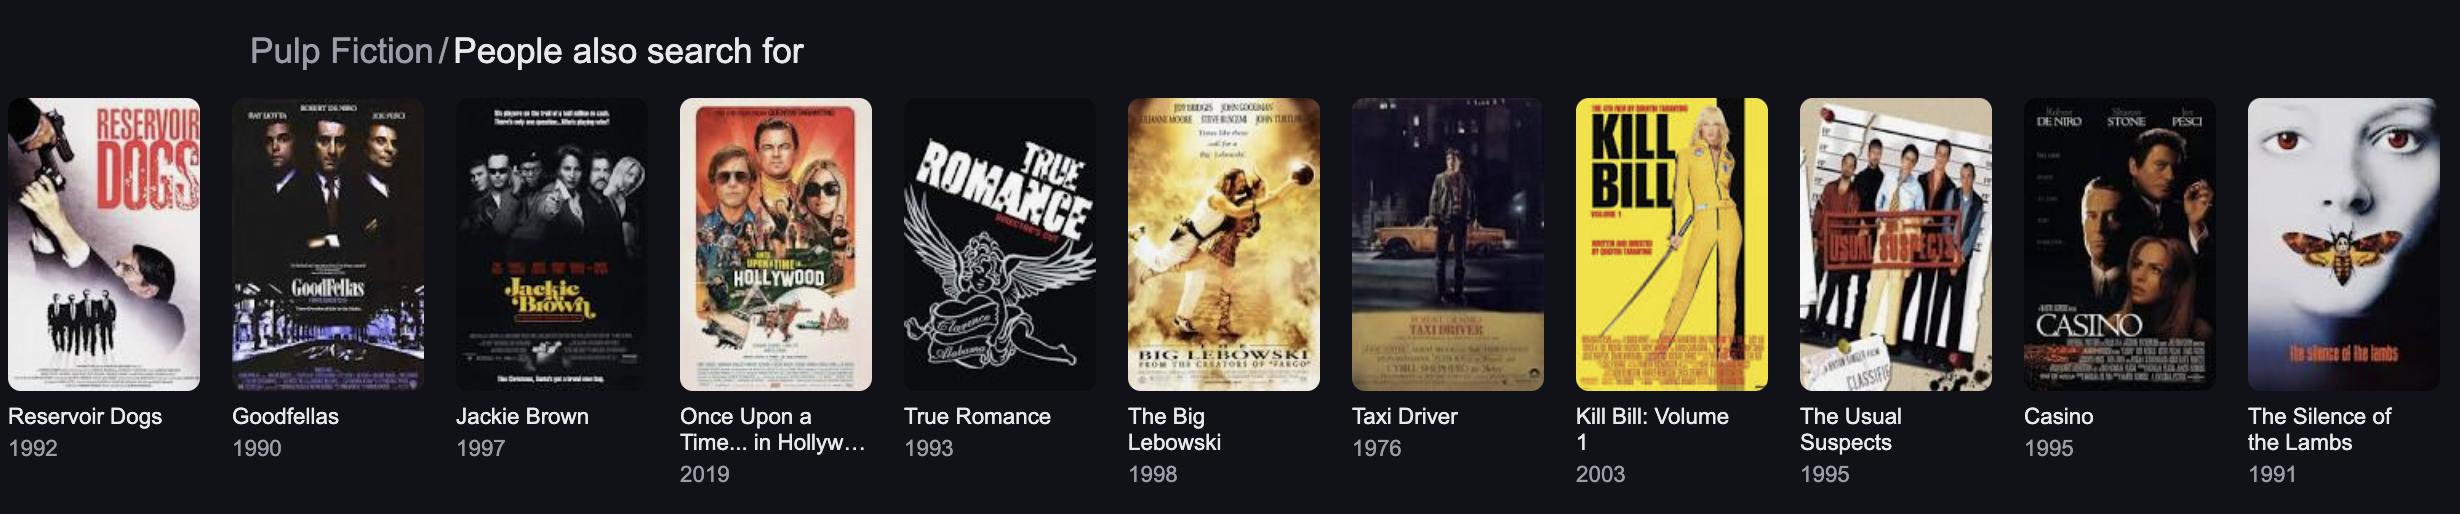

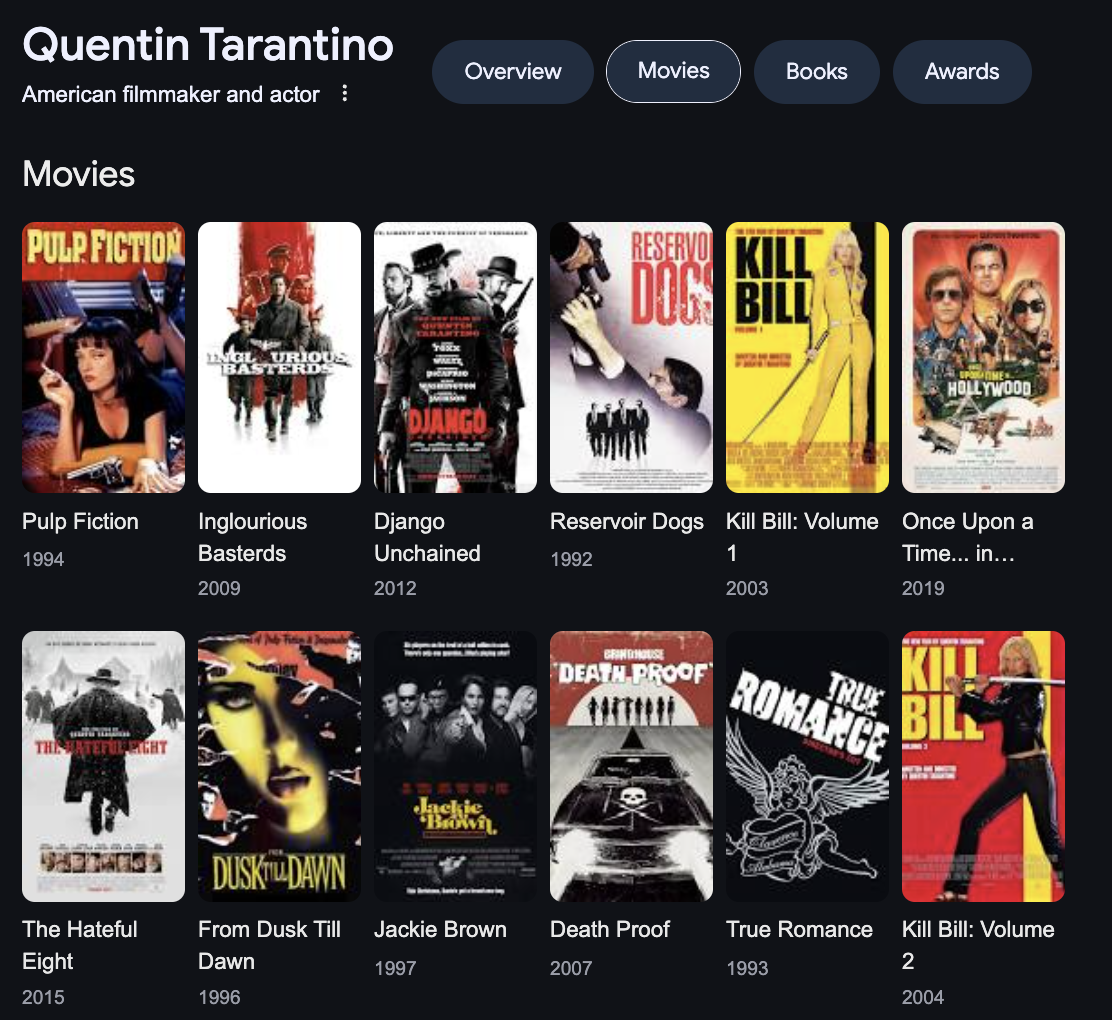

## Matrix Factorization

In [171]:
# !pip install cmfrec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.4/268.4 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.26.post1-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.1.post11-cp311-cp311-linux_x86_64.whl size=6280246 sha256=ad3489f3d9ddb4ded38cbb9142eff6eee01eae74f06660754dda69a157de498b
  Stored in directory: /root/.cache/pip/wheels/2a/e9/be/2c742b9eaa1a4b11b23a5b79dbd93ec9b445e317573d4f03ac
Successfully built cmfrec


In [173]:
# Aggregate by averaging ratings for duplicate (UserID, Title) pairs
df_matrix_fact = df_final.groupby(['UserID', 'MovieID'])['Rating'].mean().reset_index()

In [174]:
## Converting our matrix into the format that is accepted in the 'Collective Matrix Factorization Model'

df_matrix_fact.sample(5)

,UserID,MovieID,Rating
654576,3957,913,5.0
211175,1289,1303,3.0
994640,6032,1032,5.0
967062,5848,2324,5.0
598207,3650,3543,4.0


In [176]:
## The Columns name needs to be specified in the following format.

df_matrix_fact.columns = ['UserId', 'ItemId', 'Rating']

In [177]:
df_matrix_fact.sample(5)

,UserId,ItemId,Rating
310283,1854,2872,3.0
105708,699,2374,2.0
976514,5913,34,5.0
1386,13,1429,3.0
746100,4470,2145,3.0


In [178]:
df_matrix_fact.shape

(996665, 3)

In [175]:
from cmfrec import CMF

In [237]:
## Initialising and fiiting the CMF Model
## We observed best recommendation at k(latent factor) = 50

model = CMF(k = 50, lambda_ = 0.1, method = 'als', verbose = False, user_bias= True, item_bias=True)
model.fit(df_matrix_fact)

Collective matrix factorization model
(explicit-feedback variant)


In [238]:
## Users matrix shape

model.A_.shape

(6040, 50)

In [239]:
## Items matrix shape

model.B_.shape

(3688, 50)

In [240]:
model.A_

array([[-0.16706257, -0.35628554, -0.14455456, ...,  0.39382768,
         0.04093885, -0.32932538],
       [ 0.10144717,  0.30729926, -0.5309012 , ...,  0.21462575,
        -0.06860225, -0.28082377],
       [-0.39914042, -0.04626046, -0.02366884, ..., -0.20249115,
        -0.37193012, -0.38056582],
       ...,
       [ 0.21973656,  0.01960473, -0.20451277, ...,  0.02273694,
        -0.12490839,  0.00506723],
       [-0.1071611 , -0.07584582, -0.22551583, ..., -0.28220692,
         0.0041018 , -0.24443078],
       [-0.10558881, -0.10045871,  0.26245502, ...,  0.04204621,
         0.01344272,  0.35875246]], dtype=float32)

In [241]:
model.B_

array([[-0.7873716 ,  0.19960643,  0.01308054, ...,  0.02991598,
         0.59776944, -0.23912615],
       [-0.36509898,  0.56811374, -0.5646395 , ...,  0.21436879,
         0.6762797 , -1.3015836 ],
       [-0.246014  , -0.5008277 , -1.8349698 , ...,  0.36713484,
         0.38827312, -0.65988714],
       ...,
       [-0.22341384,  0.10702207,  0.13441163, ..., -0.11515591,
        -0.01904523, -0.01908816],
       [-0.00340707, -0.05343762,  0.02886893, ...,  0.02659353,
         0.01845852,  0.00206733],
       [ 0.00820245, -0.02194587, -0.02037143, ...,  0.01758214,
         0.01198719, -0.00586766]], dtype=float32)

In [242]:
np.dot(model.A_,model.B_.T).shape

(6040, 3688)

In [243]:
model.glob_mean_

3.5799641609191895

In [244]:
top_items = model.topN(user = 237, n = 10)
top_items

array(['1232', '3185', '907', '2624', '2897', '3004', '3916', '3864',
       '2205', '116'], dtype=object)

In [245]:
## Top 10 movies recommende by model for user '237'

movies.loc[movies.MovieID.isin(top_items)]

,MovieID,Title,Genres
114,116,Anne Frank Remembered (1995),Documentary
895,907,"Gay Divorcee, The (1934)",Comedy|Musical|Romance
1213,1232,Stalker (1979),Mystery|Sci-Fi
2136,2205,Mr. & Mrs. Smith (1941),Comedy
2555,2624,After Life (1998),Drama
2828,2897,And the Ship Sails On (E la nave va) (1984),Comedy|War
2935,3004,"Bachelor, The (1999)",Comedy|Romance
3116,3185,Snow Falling on Cedars (1999),Drama
3794,3864,Godzilla 2000 (Gojira ni-sen mireniamu) (1999),Action|Adventure|
3846,3916,Remember the Titans (2000),Drama


In [246]:
df_final[df_final['UserID'] == 237].sort_values(by='Rating', ascending=False)[['Title','Genres']].head(10)

,Title,Genres
916356,Return to Me,Drama|Romance
930494,Gladiator,Action|Drama
742875,"Sixth Sense, The",Thriller
756151,"Christmas Story, A",Comedy|Drama
103761,Maverick,Action|Comedy|Western
128614,Jurassic Park,Action|Adventure|Sci-Fi
274637,Top Gun,Action|Romance
480199,Titanic,Drama|Romance
545899,Back to the Future Part III,Comedy|Sci-Fi|Western
357485,Back to the Future,Comedy|Sci-Fi


### The movies recommended by the model closely align with those the user has highly rated, and the genres also reflect this preference.

In [247]:
top_items1 = model.topN(user = 1002, n = 10)
top_items1

array(['759', '3616', '3093', '2170', '3760', '3', '3718', '501', '2337',
       '175'], dtype=object)

In [248]:
movies.loc[movies.MovieID.isin(top_items1)]

,MovieID,Title,Genres
2,3,Grumpier Old Men (1995),Comedy|Romance
173,175,Kids (1995),Drama
497,501,Naked (1993),Drama
749,759,Maya Lin: A Strong Clear Vision (1994),Documentary
2101,2170,Wrongfully Accused (1998),Action|Comedy
2268,2337,Velvet Goldmine (1998),Drama
3024,3093,McCabe & Mrs. Miller (1971),Drama|Western
3547,3616,Loser (2000),Comedy|Romance
3649,3718,American Pimp (1999),Documentary
3691,3760,"Kentucky Fried Movie, The (1977)",Comedy


In [249]:
df_final[df_final['UserID'] == 1002].sort_values(by='Rating', ascending=False)[['Title','Genres']].head(10)

,Title,Genres
805989,"Insider, The",Drama
253017,Secrets & Lies,Drama
330294,"Right Stuff, The",Drama
326534,Amadeus,Drama
324351,Full Metal Jacket,Action|Drama|War
322725,"Godfather: Part II, The",Action|Crime|Drama
314817,GoodFellas,Crime|Drama
291702,"Thin Blue Line, The",Documentary
802670,Being John Malkovich,Comedy
525783,Rain Man,Drama


### Here we can also the same pattern as above .